In [109]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
import os
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# importing the dataset

In [111]:
#import dataset
ds=pd.read_csv('C:/Users/nebiy/Documents/Dataset/datasets/Reviews.csv')

In [112]:
ds.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# EDA

In [113]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [114]:
ds.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [115]:
ds=ds.dropna(how='any')

In [116]:
ds.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [117]:
#ds[ds['UserId']]

In [118]:
ds.drop(['ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Summary','Text'],axis=1,inplace=True)

In [119]:
ds['Time'].value_counts()

Time
1350345600    1143
1322179200    1088
1322438400    1070
1346889600    1018
1344211200     989
              ... 
1095638400       1
1102636800       1
1080259200       1
1087689600       1
1069718400       1
Name: count, Length: 3168, dtype: int64

In [120]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568401 entries, 0 to 568453
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Id         568401 non-null  int64 
 1   ProductId  568401 non-null  object
 2   UserId     568401 non-null  object
 3   Score      568401 non-null  int64 
 4   Time       568401 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 26.0+ MB


# Encoding the features

In [121]:
object_encoders={}
columns=['ProductId','UserId']
for col in columns:
    le=LabelEncoder()
    ds[col]=le.fit_transform(ds[col])
    #storing the feature values and its encoded values
    object_encoders[col]=le

# lets make more features:
    * day of the week
    * month
    *time of the day(Hour)

In [122]:
#change the time stamp into datatime
ds['Time']=pd.to_datetime(ds['Time'],unit='s',utc=True)
ds['Time']=ds['Time'].dt.tz_convert('America/New_York')

In [123]:
ds.head()

,Id,ProductId,UserId,Score,Time
0,1,27619,188633,5,2011-04-26 20:00:00-04:00
1,2,72383,25104,1,2012-09-06 20:00:00-04:00
2,3,15267,210468,4,2008-08-17 20:00:00-04:00
3,4,19718,152622,2,2011-06-12 20:00:00-04:00
4,5,69007,57800,5,2012-10-20 20:00:00-04:00


In [124]:
ds.head()

,Id,ProductId,UserId,Score,Time
0,1,27619,188633,5,2011-04-26 20:00:00-04:00
1,2,72383,25104,1,2012-09-06 20:00:00-04:00
2,3,15267,210468,4,2008-08-17 20:00:00-04:00
3,4,19718,152622,2,2011-06-12 20:00:00-04:00
4,5,69007,57800,5,2012-10-20 20:00:00-04:00


In [125]:
#year
ds['year']=ds['Time'].dt.year
#month
ds['month']=ds['Time'].dt.month
#week
ds['day_of_week']=ds['Time'].dt.dayofweek
#hour
ds['hour']=ds['Time'].dt.time

In [126]:
ds.head()

,Id,ProductId,UserId,Score,Time,year,month,day_of_week,hour
0,1,27619,188633,5,2011-04-26 20:00:00-04:00,2011,4,1,20:00:00
1,2,72383,25104,1,2012-09-06 20:00:00-04:00,2012,9,3,20:00:00
2,3,15267,210468,4,2008-08-17 20:00:00-04:00,2008,8,6,20:00:00
3,4,19718,152622,2,2011-06-12 20:00:00-04:00,2011,6,6,20:00:00
4,5,69007,57800,5,2012-10-20 20:00:00-04:00,2012,10,5,20:00:00


In [127]:
ds.isnull().sum()

Id             0
ProductId      0
UserId         0
Score          0
Time           0
year           0
month          0
day_of_week    0
hour           0
dtype: int64

In [128]:
#droping the time column
clean_data=ds.drop(['Time'],axis=1)

In [129]:
#dropign the ID
clean_data.drop(['Id'],axis=1,inplace=True)

In [130]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568401 entries, 0 to 568453
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductId    568401 non-null  int32 
 1   UserId       568401 non-null  int32 
 2   Score        568401 non-null  int64 
 3   year         568401 non-null  int32 
 4   month        568401 non-null  int32 
 5   day_of_week  568401 non-null  int32 
 6   hour         568401 non-null  object
dtypes: int32(5), int64(1), object(1)
memory usage: 23.9+ MB


In [131]:
#convert the hour feature into int
clean_data['hour']=clean_data['hour'].apply(lambda x:x.hour )

# lets add another feature:
    * Name of the feature is: recomended
        *the feature if gonna be boolean
        * we are gonna assign it True if its equal or greater than 3 : False other wise

In [132]:
clean_data['Recomended']=clean_data['Score']>=3

In [133]:
clean_data.columns

Index(['ProductId', 'UserId', 'Score', 'year', 'month', 'day_of_week', 'hour',
       'Recomended'],
      dtype='object')

## droping the 'Rate'---> Score

In [134]:
clean_data.drop(['Score'],axis=1,inplace=True)

# split into train and test

In [135]:
#split into train and test
train,test=train_test_split(
    clean_data,
    random_state=42,
    test_size=0.2,
    stratify=clean_data['Recomended']
)

# lets check for data distribution

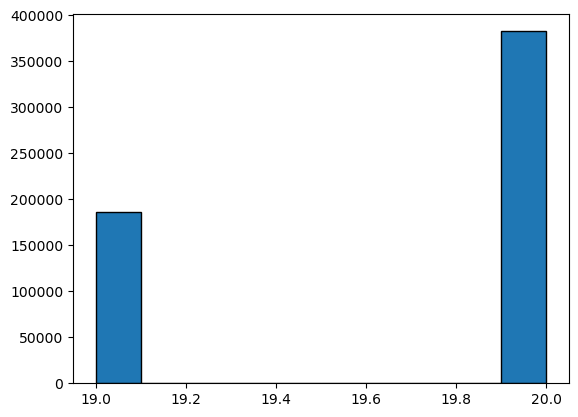

In [136]:
plt.hist(clean_data['hour'],edgecolor='black')
plt.show()

# turn them into torch dataset

In [137]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [138]:
p=torch.tensor(90,dtype=torch.long)

In [139]:
class Mydataset(Dataset):
    def __init__(self,data):
        super().__init__()
        self.data=data
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,idx):
        #element to extract
        item=self.data.iloc[idx]
        
        return {
            "product_id":torch.tensor([item['ProductId']],dtype=torch.long).to(device),
            "user_id":torch.tensor([item['UserId']],dtype=torch.long).to(device) ,
            "year":torch.tensor([item['year']],dtype=torch.long).to(device) ,
            "month":torch.tensor([item['month']],dtype=torch.long).to(device) ,
            "day_of_week":torch.tensor([item['day_of_week']],dtype=torch.long).to(device) ,
            "hour":torch.tensor([item['hour']],dtype=torch.long).to(device) ,
            "recomended":torch.tensor([int(item['Recomended'])],dtype=torch.long).to(device)
        }

## loading the torch dataset format

In [140]:
#trainig dataset
train_dataset=Mydataset(train)
test_dataset=Mydataset(test)

In [141]:
print(train_dataset)
print(test_dataset)

In [142]:
print(test_dataset[0])

{'product_id': tensor([51840]), 'user_id': tensor([14107]), 'year': tensor([2010]), 'month': tensor([10]), 'day_of_week': tensor([4]), 'hour': tensor([20]), 'recomended': tensor([1])}


# turning it into torch dataloader

In [143]:
#making the train dataloader
train_dataloader=DataLoader(
    dataset=train_dataset,
    batch_size=32
)

#making test dataloader
test_dataloader=DataLoader(
    dataset=test_dataset,
    batch_size=32
)

In [144]:
# acessing elements of the dataloader
for batch in train_dataloader:
    print(batch['product_id'].shape)
    print(batch['user_id'].shape)
    break

torch.Size([32, 1])
torch.Size([32, 1])


In [145]:
import sys
sys.path.append('C:/Users/nebiy/Documents/recommendation_system/tiny_recommendation/jupyter_notes/trial.py')
from trial import WideDeep,WD_Config

In [146]:
config=WD_Config()
model=WideDeep(config)

# setup the config of the model

In [147]:
clean_data.head()

,ProductId,UserId,year,month,day_of_week,hour,Recomended
0,27619,188633,2011,4,1,20,True
1,72383,25104,2012,9,3,20,False
2,15267,210468,2008,8,6,20,True
3,19718,152622,2011,6,6,20,False
4,69007,57800,2012,10,5,20,True


In [148]:
clean_data["day_of_week"].value_counts()

day_of_week
2    87051
1    85986
0    85850
6    85360
3    79679
5    72791
4    71684
Name: count, dtype: int64

In [149]:
config.num_product=clean_data['ProductId'].nunique()+1
config.num_users=clean_data['UserId'].nunique() +1
config.num_year=clean_data["year"].nunique()+1
config.num_time_day=clean_data["hour"].nunique()+1
config.num_month=clean_data['month'].nunique()+1
config.num_day_week=clean_data["day_of_week"].nunique()+1
config.embedding_dim=100

In [150]:
print(config)

WD_Config(num_product=74258, num_users=256043, num_day_week=8, num_month=13, num_time_day=3, num_feature=6, embedding_dim=100, num_year=15)


In [151]:
model=model.to(device)

In [152]:
optim=torch.optim.AdamW(model.parameters(),lr=0.01)  #the deep component
loss=torch.nn.BCELoss() 

In [153]:
train.head()

,ProductId,UserId,year,month,day_of_week,hour,Recomended
111574,54325,45905,2012,7,5,20,True
277404,20497,250166,2011,4,4,20,True
482554,11025,39472,2012,9,2,20,True
211505,40522,8470,2010,6,1,20,True
203596,59375,218459,2011,9,4,20,True


In [154]:
for i in train_dataset[0].values():
    print(i.shape)

torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])


# lets debug some stuff with data and model

In [155]:
# lets access 10 elements from one batch
for batch in train_dataloader:
    product_id=batch["product_id"]
    user_id=batch["user_id"]
    year=batch["year"]
    month=batch["month"]
    day_of_week=batch["day_of_week"]
    hour=batch["hour"]
    recomended=batch["recomended"]
    
    print(product_id.shape)
    print(user_id.shape)
    print(year.shape)
    print(recomended.shape)
    print(month.shape)
    print(year.shape)
    print(day_of_week.shape)

    break

torch.Size([32, 1])
torch.Size([32, 1])
torch.Size([32, 1])
torch.Size([32, 1])
torch.Size([32, 1])
torch.Size([32, 1])
torch.Size([32, 1])


# train my model

In [156]:
print(config)

WD_Config(num_product=74258, num_users=256043, num_day_week=8, num_month=13, num_time_day=3, num_feature=6, embedding_dim=100, num_year=15)


In [157]:
min_year=clean_data['year'].min()
max_year=clean_data['year'].max()

In [158]:
print(min_year)
print(max_year)

1999
2012


# lets setup the architecchure of the model

In [159]:
#lets start the training
n_epoch=3
for epoch in range(n_epoch):
    for batch in train_dataloader:
        #getting the shape right
        product_id=batch['product_id'].unsqueeze(dim=1)
        user_id=batch['user_id'].unsqueeze(dim=1)
        year=batch['year'].unsqueeze(dim=1)
        month=batch['month'].unsqueeze(dim=1)
        day_of_week=batch['day_of_week'].unsqueeze(dim=1)
        hour=batch['hour'].unsqueeze(dim=1)
        
        #feed forward model
        model_pred=model(
            product_id,
            user_id,
            year,
            month,
            day_of_week,
            hour,
            min_year,
            max_year
        )
        print(model_pred)
        break

TypeError: forward() takes 7 positional arguments but 9 were given